Importing the important libraries 

In [1]:
# %pip install imbalanced-learn seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Data preprocessing
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
# Handling imbalanced data
from imblearn.under_sampling import RandomUnderSampler
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
# Reading the dataset
data = pd.read_csv('creditcard.csv')

About the Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Analysing the Dataset

In [2]:
data.shape

(284807, 31)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking for null values
data.isnull().sum()
# No null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Making Bar Chart to check Fraud and Non Fraud classes

<Axes: xlabel='Class'>

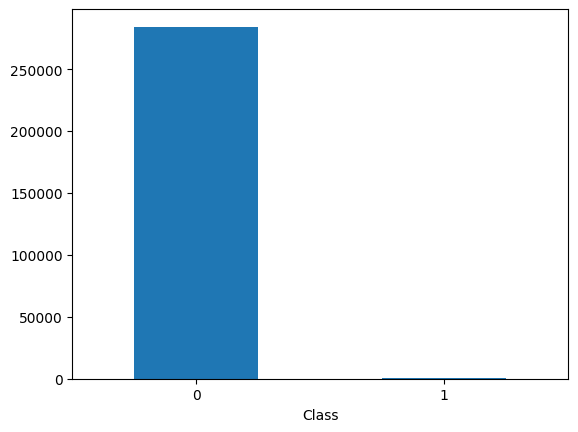

In [7]:
# plotting the class column
data['Class'].value_counts().plot(kind='bar', rot=0)

In machine learning, an imbalanced dataset refers to a dataset where the distribution of classes is highly skewed, meaning that one class has significantly more samples than the other(s). This class imbalance can pose challenges for machine learning algorithms, as they tend to favor the majority class and may struggle to properly learn patterns and make accurate predictions for the minority class.

In an imbalanced dataset, the class of interest (often referred to as the minority class) typically represents the rare or underrepresented occurrence, such as fraudulent transactions, rare diseases, or anomalies. The other class, known as the majority class, represents the more common or normal occurrences. The class imbalance can be severe, with the minority class representing only a small fraction of the overall dataset.

As we can see that from bar chart that this dataset is the perfect example of imbalanced dataset as the '0' class account for the majority of the dataset and only 0.172% values belong to the '1' class. This makes the '0' class a Majority class and '1' a Minority Class.

The presence of an imbalanced dataset can lead to biased model training and inaccurate predictions. Machine learning algorithms trained on imbalanced data may have a strong bias towards the majority class, resulting in low sensitivity or recall for the minority class. This means that the algorithm may struggle to correctly identify instances of the minority class, leading to a high number of false negatives.

Addressing class imbalance is crucial in such scenarios. Various techniques can be applied to handle imbalanced datasets, including:

1. Resampling: This involves either oversampling the minority class by replicating existing samples or undersampling the majority class by reducing its sample size. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) and random undersampling are commonly used.

2. Algorithmic approaches: Certain algorithms, such as cost-sensitive learning, assign different misclassification costs to different classes, encouraging the model to focus on the minority class during training.

3. Ensemble methods: Ensemble techniques like bagging, boosting, or stacking can combine multiple models to improve overall performance and mitigate the impact of class imbalance.

It's important to carefully handle imbalanced datasets to ensure fair and accurate modeling. The choice of technique depends on the specific characteristics of the dataset and the problem at hand. Proper evaluation metrics, such as precision, recall, F1 score, or area under the receiver operating characteristic curve (AUC-ROC), should also be considered to assess the model's performance on both classes in an imbalanced dataset.

Making the matrix of features

In [8]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
print(f"{x.shape} and {y.shape}")

(284807, 30) and (284807,)


Making the fraud and non-fraud variables

In [10]:
# seperating class imbalance
fraud = data[data['Class']==1]
non_fraud = data[data['Class']==0]
print(fraud.shape,non_fraud.shape)

(492, 31) (284315, 31)


Performing Random Under Sampling

Random undersampling is a technique used to address class imbalance in a dataset by reducing the number of samples from the majority class. It randomly selects a subset of samples from the majority class to make the class distribution more balanced.

Here's how you can apply random undersampling in machine learning:

1. Understand the class imbalance: First, analyze the class distribution in your dataset to identify the class that is in the majority and the class that is in the minority.

2. Split the dataset: Split your dataset into features (`X`) and the corresponding class labels (`y`).

3. Determine the undersampling ratio: Decide on the desired ratio between the number of samples in the majority class and the minority class. You can set this ratio based on your domain knowledge or use techniques like heuristic rules or cross-validation to find an appropriate value.

4. Implement random undersampling: Use a library like `imbalanced-learn` in Python to perform random undersampling.

5. Use the undersampled dataset for training: Now, you can use the `X_resampled` and `y_resampled` datasets to train your machine learning model. Since the class distribution is more balanced, the model is less likely to be biased towards the majority class.

In [11]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(x, y)

In [12]:
print(f"{X_resampled.shape} and {y_resampled.shape}")

(984, 30) and (984,)


In [13]:
print(f"Before undersampling: {x.shape} and {y.shape}")
print(f"After undersampling: {X_resampled.shape} and {y_resampled.shape}")

Before undersampling: (284807, 30) and (284807,)
After undersampling: (984, 30) and (984,)


Splitting the UnderSampled Datasets

In [14]:
# Splitting the dataset into the Training set and Test set
x_train , x_test , y_train , y_test = train_test_split(X_resampled,y_resampled,test_size=0.20,random_state=0)

Applying Feature Scaling

In [15]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

Training Using Logistic Regression

In [16]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
# predicting the test set results
y_pred = classifier.predict(x_test)

In [18]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
# Printing the accuracy in percentage
print(f"{accuracy_score(y_test,y_pred)*100:.2f}%")

[[88  3]
 [12 94]]
92.39%


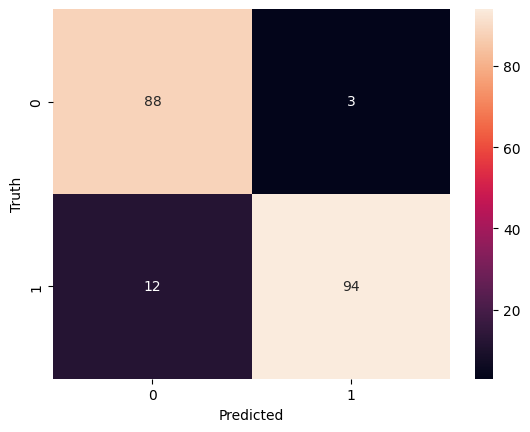

In [19]:
# making image of confusion matrix
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Training Using Decision Tree Model

In [20]:
# Trainig the decision tree model on the training set
dt_classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
# predicting the test set results
y_pred = dt_classifier.predict(x_test)


In [22]:
# Making the Confusion Matrix
# confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# accuracy score: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

[[82  9]
 [10 96]]
90.36%


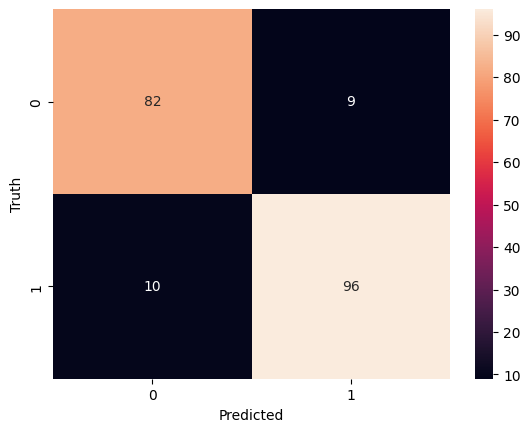

In [23]:
# making image of confusion matrix
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Training Using Random Forest Model

In [24]:
# training the random forest model on the training set
rf_classifier = RandomForestClassifier(n_estimators=3000,criterion='entropy',random_state=0)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3000, random_state=0)

In [25]:
# predicting the test set results
y_pred = rf_classifier.predict(x_test)

In [26]:
# Making the Confusion Matrix
# confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# accuracy score: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

[[89  2]
 [13 93]]
92.39%


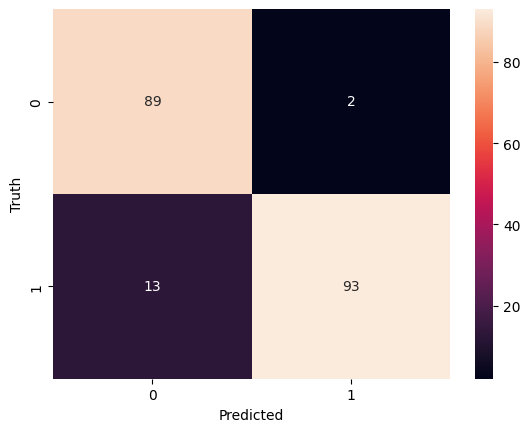

In [27]:
# making image of confusion matrix
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Training Using the KNN Model

In [28]:
# training the knn model on the training set
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
# predicting the test set results
y_pred = knn_classifier.predict(x_test)

In [30]:
# making the confusion matrix
# confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# accuracy score: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

[[89  2]
 [19 87]]
89.34%


In [31]:
# training the svm model on the training set
svm_classifier = SVC(kernel='linear',random_state=0)
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [32]:
# predicting the test set results
y_pred = svm_classifier.predict(x_test)

In [33]:
# making the confusion matrix
# confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# accuracy score: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

[[88  3]
 [13 93]]
91.88%


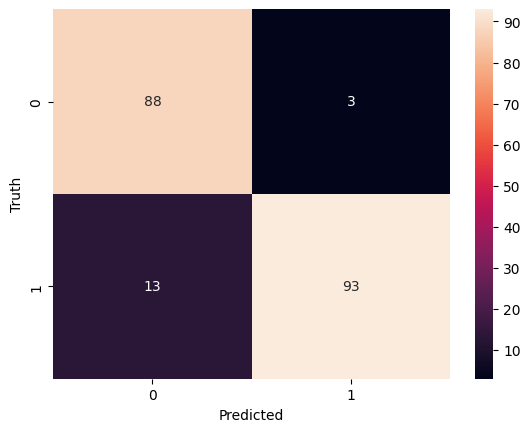

In [34]:
# making image of confusion matrix
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Training Using Naive Bayes Model

In [35]:
# training the naive bayes model on the training set
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [36]:
# predicting the test set results
y_pred = nb_classifier.predict(x_test)

In [37]:
# making the confusion matrix
# confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# accuracy score: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

[[87  4]
 [16 90]]
89.85%


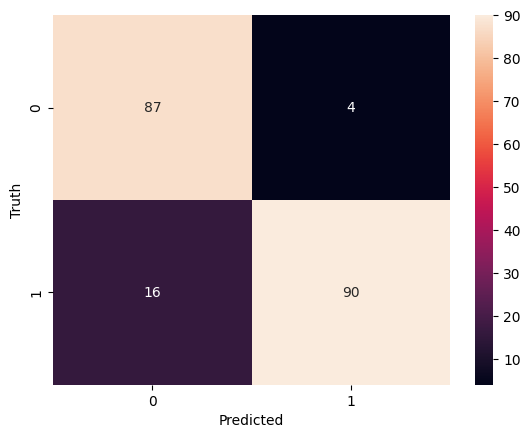

In [38]:
# making image of confusion matrix
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Conclusion

In conclusion, we conducted a credit card fraud detection project with the goal of identifying fraudulent transactions accurately. We compared several machine learning models and evaluated their performance based on accuracy.

After careful analysis and experimentation, we found that the Random Forest Classifier exhibited the highest accuracy of 92.39% among all the models tested. This indicates that the Random Forest Classifier is capable of accurately distinguishing between fraudulent and legitimate credit card transactions in our dataset.

The high accuracy achieved by the Random Forest Classifier suggests its effectiveness in capturing the complex patterns and relationships within the data, enabling it to make accurate predictions. This makes it a promising choice for credit card fraud detection tasks.

However, it's important to note that accuracy alone may not provide a complete assessment of the model's performance. Other metrics such as precision, recall, and F1 score should also be considered, as they provide insights into the model's ability to correctly classify fraud cases while minimizing false positives or false negatives.

In future work, it would be valuable to conduct further evaluations of the Random Forest Classifier and compare its performance against other metrics and techniques. Additionally, exploring ensemble methods, feature engineering, or data augmentation techniques may help enhance the model's performance and improve fraud detection accuracy even further.